In [1]:
import pickle
from keras.layers import Input, Lambda, Dense, Flatten
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model,Model,Sequential
from mtcnn.mtcnn import MTCNN
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
from deepface import DeepFace
import os

In [3]:
img_size = [224,224]

In [2]:
root = r"C:\Users\ashwi\Desktop\Sp_Hawk\face recognition\ID Cards"
train_path = r"C:\Users\ashwi\Desktop\Sp_Hawk\face recognition\ID_DATA\train"
val_path = r"C:\Users\ashwi\Desktop\Sp_Hawk\face recognition\ID_DATA\test"

In [27]:
vgg = VGG16(input_shape = img_size + [3], weights='imagenet', include_top=False)

In [28]:
for layer in vgg.layers:
    layer.trainable=False

In [29]:
folders = os.listdir(r"C:\Users\ashwi\Desktop\Sp_Hawk\face recognition\ID_DATA\train")

In [30]:
label={}
i=0
for name in os.listdir(train_path):
    label[i]=name
    i+=1
label

{0: 'Alugoju Sathish',
 1: 'Amol Dayanand Mane',
 2: 'Anchala sahu',
 3: 'Bhosale Atul Haridas',
 4: 'Dipali Balkrishna Pawar',
 5: 'Dnyaneshwari Laxman Patil',
 6: 'Droupadi Maharana',
 7: 'erukali naveen',
 8: 'Kale Abhijit Kishor',
 9: 'Kandukuri K Basha',
 10: 'Katkamwar Anand',
 11: 'Laxmibai Sharanappa Bijjargi',
 12: 'Manisha Kiran Taral',
 13: 'Meghana .K',
 14: 'Moyna Das_',
 15: 'Nilesh Harishchandra Patil',
 16: 'Nitin salokhe',
 17: 'Rajendra Beja',
 18: 'Rohini Lindayat Rajendra',
 19: 'S Ashwin Kumar',
 20: 'Sai Deepika Pasamala',
 21: 'Sarika Babaji Kadam',
 22: 'Sasmita Kumari Guru',
 23: 'Sivakumar C',
 24: 'Somesh',
 25: 'Sunil Badaseth',
 26: 'Supriya Kanchan Topno',
 27: 'Uday Gurav',
 28: 'Ughade Shital Sanjay',
 29: 'V Ashok',
 30: 'Venu Gopal .P',
 31: 'Vijay Arun Mane',
 32: 'zareena'}

In [31]:
x = Flatten()(vgg.output)

In [32]:
prediction = Dense(len(folders),activation='softmax')(x)

In [33]:
model = Model(inputs= vgg.input, outputs=prediction)

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [35]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [36]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
training_set = train_datagen.flow_from_directory(
    root,
    target_size = img_size,
    batch_size = 8,
    class_mode = 'categorical'
)

Found 83 images belonging to 33 classes.


In [74]:
test_set = test_datagen.flow_from_directory(
    val_path ,
    target_size = img_size,
    batch_size = 8,
    class_mode = 'categorical'
)

Found 33 images belonging to 33 classes.


In [76]:
# 8 epochs
r8 = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=8,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/8
11/11 [==============================] - 35s 3s/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.4330 - val_accuracy: 0.9697
Epoch 2/8
11/11 [==============================] - 37s 3s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.4280 - val_accuracy: 0.9697
Epoch 3/8
11/11 [==============================] - 34s 3s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.4294 - val_accuracy: 0.9697
Epoch 4/8
11/11 [==============================] - 31s 3s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.4348 - val_accuracy: 0.9697
Epoch 5/8
11/11 [==============================] - 33s 3s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.4519 - val_accuracy: 0.9697
Epoch 6/8
11/11 [==============================] - 32s 3s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.4608 - val_accuracy: 0.9697
Epoch 7/8
11/11 [==============================] - 33s 3s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4656 - val_accuracy: 0.9697
Epoch 8/8
11/11 [==========

In [39]:
# 10 epochs
r10 = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
11/11 [==============================] - 50s 5s/step - loss: 6.9120 - accuracy: 0.0723 - val_loss: 2.6277 - val_accuracy: 0.4337
Epoch 2/10
11/11 [==============================] - 48s 5s/step - loss: 2.0737 - accuracy: 0.4458 - val_loss: 0.6492 - val_accuracy: 0.8434
Epoch 3/10
11/11 [==============================] - 47s 4s/step - loss: 0.6766 - accuracy: 0.8072 - val_loss: 0.1782 - val_accuracy: 0.9759
Epoch 4/10
11/11 [==============================] - 49s 5s/step - loss: 0.3390 - accuracy: 0.8795 - val_loss: 0.0880 - val_accuracy: 0.9880
Epoch 5/10
11/11 [==============================] - 50s 5s/step - loss: 0.1215 - accuracy: 0.9759 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 6/10
11/11 [==============================] - 52s 5s/step - loss: 0.1361 - accuracy: 0.9518 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 7/10
11/11 [==============================] - 51s 5s/step - loss: 0.0467 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 8/10
11/11 [==

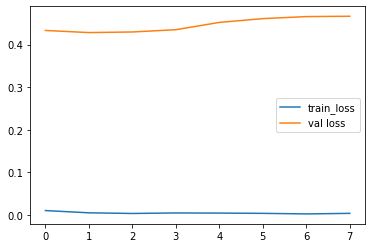

In [77]:
plt.plot(r8.history['loss'], label='train_loss')
plt.plot(r8.history['val_loss'], label='val loss')
plt.legend()
plt.show()

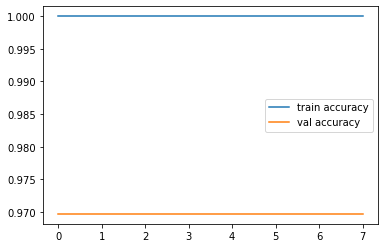

In [78]:
plt.plot(r8.history['accuracy'], label='train accuracy')
plt.plot(r8.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [42]:
model.save('vgg_model.h5')

In [51]:
# Saving the labels
import json
inv_map = {v: k for k, v in test_set.class_indices.items()}
with open('mapping.json', 'w') as fp:
    json.dump(inv_map, fp)

# Model infernece

In [61]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import json
import matplotlib.pyplot as plt

In [45]:
model = load_model('vgg_model.h5')

In [46]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [58]:
import json
mapping = []
with open('mapping.json') as f:
    for line in f:
        mapping.append(json.loads(line))
mapping = mapping[0]
print(mapping)

{'0': 'Alugoju Sathish', '1': 'Amol Dayanand Mane', '2': 'Anchala sahu', '3': 'Bhosale Atul Haridas', '4': 'Dipali Balkrishna Pawar', '5': 'Dnyaneshwari Laxman Patil', '6': 'Droupadi Maharana', '7': 'Kale Abhijit Kishor', '8': 'Kandukuri K Basha', '9': 'Katkamwar Anand', '10': 'Laxmibai Sharanappa Bijjargi', '11': 'Manisha Kiran Taral', '12': 'Meghana .K', '13': 'Moyna Das_', '14': 'Nilesh Harishchandra Patil', '15': 'Nitin salokhe', '16': 'Rajendra Beja', '17': 'Rohini Lindayat Rajendra', '18': 'S Ashwin Kumar', '19': 'Sai Deepika Pasamala', '20': 'Sarika Babaji Kadam', '21': 'Sasmita Kumari Guru', '22': 'Sivakumar C', '23': 'Somesh', '24': 'Sunil Badaseth', '25': 'Supriya Kanchan Topno', '26': 'Uday Gurav', '27': 'Ughade Shital Sanjay', '28': 'V Ashok', '29': 'Venu Gopal .P', '30': 'Vijay Arun Mane', '31': 'erukali naveen', '32': 'zareena'}


In [59]:
def face_extractor(img):
    
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    for (x,y,w,h) in  faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]
        
    return cropped_face

[[4.3683309e-14 1.4162252e-24 0.0000000e+00 0.0000000e+00 0.0000000e+00
  9.8329060e-18 0.0000000e+00 2.1700760e-13 1.0000000e+00 0.0000000e+00
  3.1092931e-08 0.0000000e+00 2.8631339e-25 7.8193445e-11 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.4592140e-14
  6.4848944e-09 1.2587864e-23 0.0000000e+00 7.2165084e-16 3.7452083e-36
  2.2257004e-30 0.0000000e+00 0.0000000e+00 5.8375341e-31 0.0000000e+00
  0.0000000e+00 3.8343961e-10 4.4314406e-28]]
1.0
Face is: Kandukuri K Basha


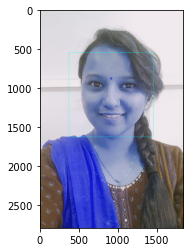

In [73]:
frame = cv2.imread(r"C:\Users\ashwi\Desktop\Sp_Hawk\face recognition\ID Cards\Dnyaneshwari Laxman Patil\Dnyana.jpg")

face = face_extractor(frame)

if type(face) is np.ndarray:
    face = cv2.resize(face , (224,224))
    im = Image.fromarray(face, 'RGB')

    img_array = np.array(im)

    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)
    print(pred)
    print(np.amax(pred[0]))
    name='No Match'

    # PRINT STAT
    index = np.where(pred[0] == np.amax(pred[0]))[0][0]
    name = mapping[str(index)]
    print('Face is:',inv_map[np.where(pred[0] == np.amax(pred[0]))[0][0]])


# Displaying the image 
plt.imshow(frame)
plt.show()

# Webcam Implementation

In [58]:


video_capture = cv2.VideoCapture(0)

while 1:
    _, frame = video_capture.read()
    
    face = face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face , (224,224))
        im = Image.fromarray(face, 'RGB')
        
        img_array = np.array(im)
        
        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)
        
        name='No Match'
        
        # PRINT STAT
        print(pred[0])
        name = inv_map[np.where(pred[0] == np.amax(pred[0]))[0][0]]
        print('Face is:',inv_map[np.where(pred[0] == np.amax(pred[0]))[0][0]])
        cv2.putText(
            frame,name,(50,50),
            cv2.FONT_HERSHEY_COMPLEX,
            1,(0,255,0),2
        )
    else:
        cv2.putText(
            frame,'No Face Found',(50,50),
            cv2.FONT_HERSHEY_COMPLEX,
            1,(0,255,0),2
        )
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
video_capture.release()
cv2.destroyAllWindows()

[4.5265213e-25 2.4657530e-18 3.5024254e-28 4.0617620e-09 2.3321326e-19
 4.6149054e-08 6.5277656e-19 2.2113579e-03 2.1604725e-23 7.8944198e-24
 1.3933237e-08 8.9187535e-27 1.1490085e-30 8.9119181e-12 2.4957202e-20
 9.4723651e-20 8.4772396e-15 1.0527809e-13 7.7998484e-19 4.3932684e-17
 8.2793661e-11 8.8157750e-30 2.6507288e-27 6.1491699e-15 2.7377848e-19
 4.6320573e-12 1.9153276e-13 2.6011273e-18 9.9778855e-01 3.6497188e-29
 9.0194669e-15 2.4783861e-13 4.7408071e-24]
Face is: V Ashok
[4.5341069e-31 3.9781295e-14 7.8783551e-22 2.3017430e-05 3.9340900e-12
 1.5997776e-09 3.6634324e-11 1.6122443e-06 2.2152338e-23 1.4868390e-25
 2.1678279e-10 3.4594764e-22 4.5400858e-20 3.1864675e-10 3.1235816e-19
 1.2845902e-12 1.6451365e-11 3.5379753e-01 1.9911426e-19 4.3812234e-09
 2.9945592e-12 5.7649981e-32 7.6848447e-24 1.7592196e-15 1.1277525e-05
 2.1706003e-06 1.2933758e-10 3.3988761e-20 6.4616442e-01 4.9459842e-32
 2.6606934e-13 3.8204045e-15 2.5996710e-22]
Face is: V Ashok
[7.9697959e-32 1.3469233e-

[1.55810602e-17 6.85530267e-07 3.67725287e-19 2.73134209e-08
 9.43660772e-15 2.08847064e-06 6.33484151e-13 7.32192278e-01
 7.74911321e-16 3.47041480e-19 3.72915139e-07 1.06143427e-13
 1.70934935e-21 5.23114441e-09 8.73363786e-21 3.98320061e-08
 2.30655295e-12 1.39015216e-10 5.25836978e-18 2.50168358e-11
 9.31042712e-03 2.30570316e-24 2.42107957e-17 2.67605578e-20
 4.92992349e-08 1.07128001e-10 1.91893112e-14 1.92075563e-13
 2.58494139e-01 3.33775053e-16 1.51569091e-10 1.83963613e-15
 1.10998010e-14]
Face is: Kale Abhijit Kishor
[1.2875958e-22 1.1185666e-16 2.0294460e-23 5.9026031e-12 5.3762369e-27
 2.7731441e-13 3.0903186e-19 9.9999940e-01 6.1679629e-17 8.2926289e-23
 6.9750698e-11 1.5842520e-16 1.2419974e-28 2.1655077e-15 3.5829603e-26
 1.1731191e-10 9.7173619e-14 3.2784807e-17 9.4085012e-17 1.5669291e-10
 3.1610004e-10 1.9640378e-30 1.4865002e-19 1.2374188e-22 4.7541807e-11
 5.7572164e-10 1.2715790e-17 3.5179440e-15 5.6781602e-07 2.1046145e-30
 6.6685760e-16 4.1649356e-21 2.6374563e-

[2.16571753e-16 2.66709566e-09 1.34316024e-17 3.49617046e-08
 1.46149419e-14 2.43720715e-05 2.97592617e-10 5.00425464e-03
 5.35161868e-17 7.17255165e-16 8.46125303e-08 2.47677745e-09
 1.77247279e-19 7.40973363e-08 3.87756437e-22 4.98443633e-01
 1.33747271e-05 3.20199288e-05 2.99173745e-13 2.10542499e-12
 4.25281525e-01 3.06755795e-22 1.47020915e-14 6.47103238e-19
 3.30485273e-06 1.01965074e-15 1.02636621e-09 6.93936089e-11
 7.11848214e-02 1.68961242e-23 1.25048391e-05 1.77346779e-18
 1.05467799e-15]
Face is: Nitin salokhe
[4.3539138e-17 4.1810382e-09 1.7708825e-17 2.9160821e-08 8.4887161e-19
 1.1928182e-03 2.3144648e-09 5.6206979e-02 5.0288680e-16 7.6283086e-17
 1.3003963e-05 2.6345055e-12 1.4668290e-20 1.9109659e-04 3.9999294e-20
 6.6653825e-05 4.5103953e-08 6.2090670e-08 2.6855891e-09 8.3851688e-14
 1.3295349e-04 4.8826313e-24 3.5084414e-15 1.9858142e-18 2.5129237e-04
 1.0508727e-11 6.8129347e-14 3.4613364e-11 9.4194216e-01 5.4922871e-24
 2.9105754e-06 8.2710457e-24 4.1338283e-15]
Fa

 7.0243017e-10 2.7062629e-16 1.8605614e-15]
Face is: Laxmibai Sharanappa Bijjargi
[4.6396811e-09 1.4913275e-16 3.0489532e-20 1.9253280e-06 1.0426619e-02
 1.1445106e-03 1.1369530e-20 1.3030186e-01 3.7896266e-18 2.3198286e-22
 7.4240118e-01 8.2971063e-08 2.4135727e-16 9.9388748e-02 9.3608745e-16
 9.2311492e-03 7.1673516e-13 4.0599314e-08 9.2711888e-10 3.1089323e-10
 3.5648759e-07 1.9027964e-20 1.5496387e-19 6.0247967e-09 7.0907394e-03
 2.3173069e-08 3.2366818e-11 2.1572879e-11 4.9661749e-06 1.1429421e-18
 1.3554624e-07 7.5574412e-06 3.3417968e-10]
Face is: Laxmibai Sharanappa Bijjargi
[8.26221210e-12 2.99830783e-18 1.35215345e-20 4.04443284e-11
 1.04563078e-05 3.61684727e-08 2.80383969e-25 3.83468752e-04
 3.45729521e-15 9.02966184e-25 9.99401689e-01 5.30874789e-11
 3.50835389e-14 3.05132244e-06 5.49377381e-19 1.41796318e-06
 1.54775552e-12 4.67795525e-10 2.30072038e-14 3.22163158e-15
 1.13150724e-08 8.77732496e-25 1.03633220e-21 4.33276977e-13
 1.99655988e-04 9.71414025e-08 1.06827291e-1

[3.47272081e-12 1.46974744e-19 1.08258427e-25 9.22016213e-11
 1.19248876e-13 2.21553776e-07 5.77577094e-24 2.33233862e-07
 5.39136131e-23 3.09553121e-27 9.99998927e-01 5.92648500e-11
 4.76342134e-21 4.54906512e-08 5.39876301e-18 4.76294504e-15
 4.33905631e-17 5.43327166e-16 2.53706816e-17 4.62138900e-16
 1.37228104e-14 1.09954009e-25 2.59730418e-23 7.43850901e-12
 6.19052628e-07 6.37787487e-16 1.17494431e-20 7.24486714e-13
 1.03014236e-10 6.05964204e-21 5.67278158e-13 1.95797954e-13
 4.09444848e-16]
Face is: Laxmibai Sharanappa Bijjargi
[3.0594258e-12 8.7343093e-17 7.3144810e-25 4.1742051e-10 6.4758043e-12
 2.5015660e-03 9.9904541e-20 3.3576768e-07 1.4945410e-20 3.0056742e-24
 9.9709427e-01 9.7279145e-09 5.3017074e-18 3.2979302e-04 1.8764825e-15
 3.1373844e-11 3.8832463e-14 5.6673596e-14 5.0052199e-16 3.4721337e-14
 5.3772794e-12 1.6959273e-22 1.4765167e-18 2.6249367e-10 7.4060728e-05
 1.0611843e-12 1.1229330e-16 9.4096543e-11 7.9905105e-09 1.1667383e-18
 4.6226870e-11 1.8690780e-11 4.

[4.95207522e-17 4.14682350e-18 7.10665606e-17 3.17228376e-18
 4.28703942e-16 4.87825232e-12 1.33958612e-18 1.48768935e-08
 2.99102797e-19 1.63473265e-20 8.67888539e-10 7.71290587e-10
 7.20480967e-11 3.56076807e-10 5.11158037e-21 1.98187604e-15
 2.46879643e-18 1.00000000e+00 7.18086048e-32 3.10007483e-18
 4.86596440e-13 3.39649578e-22 2.01526608e-17 1.22426097e-11
 3.49354967e-17 4.09257521e-14 8.14296176e-20 8.68809744e-13
 4.94677194e-16 1.75852358e-14 2.63348654e-09 4.38661663e-10
 1.37529373e-17]
Face is: Rohini Lindayat Rajendra
[7.19142221e-14 1.66865776e-15 3.97479343e-17 2.62756385e-21
 1.76311880e-16 1.99616539e-12 1.18603119e-21 1.12051601e-09
 3.29446392e-18 7.87369056e-20 3.47677457e-07 1.36069420e-10
 2.60823502e-10 5.62326852e-11 1.49965725e-19 2.30100693e-15
 2.66128570e-14 9.99999523e-01 5.34351791e-29 9.66881139e-22
 7.78110042e-12 1.79207938e-24 8.07681574e-20 1.42926018e-10
 1.15047535e-21 2.19176687e-14 2.07219510e-19 6.29955979e-16
 4.34184472e-15 6.67802152e-16 1.1

[7.5453272e-12 2.2224280e-12 3.3583078e-29 5.7649214e-13 2.8082613e-15
 1.0784553e-09 1.5606108e-19 2.9246696e-06 1.2556745e-21 5.1896577e-21
 1.0786161e-01 3.2652769e-09 5.1473958e-10 4.9641991e-01 4.4354864e-18
 3.2881787e-15 1.9109000e-16 4.4228794e-19 3.0610880e-22 4.2299667e-10
 7.1003375e-10 4.3361169e-23 1.7021679e-21 4.4398527e-11 3.9571553e-01
 1.3195672e-10 5.3241588e-25 2.2058710e-14 1.7419891e-09 3.8120295e-21
 1.3402152e-09 3.7805525e-18 4.6453236e-12]
Face is: Moyna Das_
[7.4588414e-14 9.4354580e-11 1.4006403e-30 8.6701306e-11 6.6510836e-14
 3.5080327e-06 1.2791000e-19 9.0286449e-06 3.2762120e-22 1.7307320e-18
 3.8256608e-02 1.9928040e-08 8.9832471e-13 9.2350227e-01 1.9603218e-20
 1.0899832e-12 1.0947753e-16 2.8158217e-18 1.0277421e-20 3.8130828e-08
 4.0605092e-11 6.3680632e-23 1.8229418e-17 1.2028464e-11 3.8228452e-02
 1.1195078e-10 3.7115247e-24 2.3857083e-14 5.8626815e-10 7.6711354e-22
 2.2987949e-10 4.4627145e-17 5.1198594e-12]
Face is: Moyna Das_
[3.53389991e-11 5.38

[2.3539249e-14 1.8688574e-18 2.1407019e-19 5.1769894e-21 8.0767531e-15
 1.2089709e-13 4.9874140e-18 5.5536858e-10 6.7974554e-19 2.5818964e-17
 3.0200686e-06 8.0062687e-13 3.5064487e-10 4.5138422e-09 5.7224727e-22
 3.5025685e-12 6.1664654e-17 9.9999690e-01 8.1123562e-30 1.2618247e-17
 9.3147816e-11 5.1515762e-21 3.7242577e-19 5.7946746e-12 5.8578794e-17
 8.2716989e-14 1.8688983e-20 9.3404348e-15 5.3393039e-15 7.5472747e-17
 3.8221142e-08 8.1817973e-12 3.7295096e-16]
Face is: Rohini Lindayat Rajendra
[1.6908202e-12 1.4265022e-15 8.9725412e-15 4.4911846e-18 2.4692992e-13
 1.7679447e-07 1.2155243e-16 3.7356961e-07 2.9692208e-15 4.8022216e-20
 3.8797776e-07 9.2091699e-07 3.0923027e-07 2.2250862e-08 1.5058439e-20
 6.5833727e-11 1.5588913e-14 9.9998939e-01 2.1458057e-25 8.8132647e-17
 3.0089115e-08 9.0517510e-22 1.4180154e-17 4.2455725e-10 6.7239076e-18
 9.8673266e-12 1.1248406e-17 6.4518998e-12 4.1434832e-14 1.0722337e-13
 8.4249432e-06 5.3571725e-09 7.7903912e-16]
Face is: Rohini Lindayat R

[4.7595609e-21 8.9237258e-23 3.3003903e-27 1.8927595e-07 5.3301885e-22
 1.8477931e-14 3.0104853e-37 3.4225923e-05 1.2246778e-18 4.0006471e-15
 9.9995875e-01 1.1467418e-09 6.4873736e-24 5.0105764e-06 3.4966639e-29
 6.0576018e-19 1.8415959e-19 3.3611647e-17 5.1719090e-24 2.3642871e-18
 1.0491944e-10 2.7022455e-32 2.1434802e-34 1.0280108e-17 2.9010742e-08
 9.9478143e-07 6.5828609e-10 7.1918548e-18 7.5348856e-07 2.1532320e-27
 4.2240252e-12 4.1378430e-22 2.3238635e-24]
Face is: Laxmibai Sharanappa Bijjargi
[4.0602977e-19 1.0082284e-17 7.5349686e-25 2.5925539e-09 1.7582573e-19
 2.4067159e-12 1.6193562e-34 9.0787677e-07 1.0057684e-20 2.5187597e-12
 9.9999797e-01 5.7689309e-08 1.4142493e-20 3.4028932e-12 1.8727841e-26
 7.1741278e-20 1.7744548e-20 9.3266917e-17 8.9866672e-29 1.0268122e-18
 8.0294153e-13 8.9379348e-32 1.1303795e-36 3.5953074e-17 8.4943710e-12
 2.7632174e-07 1.1842266e-08 3.2277940e-18 8.9377073e-07 1.0497842e-25
 1.0153448e-11 2.8233158e-23 8.6619128e-26]
Face is: Laxmibai Shar

[1.1355047e-22 3.6403706e-15 1.7437741e-21 1.8467704e-17 2.1175390e-13
 4.7096481e-05 1.0690774e-17 1.9478893e-03 2.5879102e-20 1.8312769e-21
 5.7622846e-13 1.3857799e-19 9.2312751e-22 3.7849200e-06 3.2520164e-19
 3.2456446e-05 2.6352018e-11 1.2847133e-23 2.6688995e-19 2.5324064e-16
 1.0463572e-11 2.4580535e-23 1.0623061e-22 7.3273116e-24 5.6897930e-04
 1.2780437e-19 4.8425881e-12 8.4644318e-24 9.9739969e-01 4.7526557e-20
 1.2642923e-07 2.4270467e-14 2.0999729e-18]
Face is: V Ashok
[4.7020109e-12 1.6501670e-09 9.8330722e-22 3.9445038e-20 1.8506215e-09
 1.8388234e-02 5.3388935e-22 2.9845893e-07 1.2484755e-16 3.5720739e-17
 3.2062812e-03 5.5420662e-16 1.7890359e-14 1.0129116e-07 1.2008915e-21
 1.8965125e-07 3.6341392e-12 5.2872653e-13 1.6678921e-18 1.9091321e-14
 2.5605237e-08 1.0534733e-24 2.9354416e-16 7.9772350e-14 2.9682973e-10
 2.8630373e-16 8.4605378e-10 7.2122349e-18 9.7840494e-01 5.7056867e-21
 2.2593503e-10 1.3294199e-14 2.1252146e-13]
Face is: V Ashok
[1.0456350e-12 5.1896598e-

 1.78200311e-21]
Face is: Laxmibai Sharanappa Bijjargi
[7.2372985e-15 1.0545305e-17 5.2989175e-24 4.1932019e-10 1.8468145e-19
 1.1240025e-03 4.3459253e-29 2.5712246e-10 2.6525118e-20 7.2889708e-30
 1.0853773e-01 6.4587300e-15 5.8980633e-22 8.9033830e-01 9.6478785e-24
 1.7580690e-16 3.2323218e-26 8.8268159e-17 5.0572756e-20 3.3269587e-19
 1.3948948e-11 9.7335563e-19 1.1370067e-22 3.4454802e-17 5.7351334e-14
 1.6362257e-10 4.4116427e-19 1.6962215e-17 1.6256085e-14 5.7733066e-25
 1.6950662e-14 3.3580908e-22 1.3064483e-20]
Face is: Moyna Das_
[2.7205646e-15 3.6597173e-16 6.4695027e-24 3.2180607e-09 8.9367824e-20
 1.2434793e-03 7.4798358e-23 3.3851863e-10 2.8595695e-22 1.6737801e-28
 6.5762177e-03 9.2545602e-16 1.2902730e-20 9.9218035e-01 1.2076581e-22
 2.4276240e-16 7.9558642e-24 1.2550033e-16 9.7479438e-18 8.0835101e-20
 1.3165213e-10 1.4263625e-19 8.1028283e-22 1.4306252e-17 4.2075319e-12
 1.1640868e-09 1.6768114e-18 4.8589443e-17 1.8967633e-14 4.4067190e-25
 7.3299553e-13 1.5536969e-20 

[5.30836659e-11 2.93788778e-12 4.69097680e-21 1.71077180e-11
 2.47640927e-12 3.11922561e-02 3.35787511e-23 3.99144163e-04
 1.59233748e-12 4.18306351e-28 9.53825593e-01 1.21617535e-10
 8.44438314e-20 1.45523855e-02 1.41291382e-16 9.39691467e-13
 3.00070508e-23 1.12727770e-11 2.48057222e-17 1.81084453e-11
 4.49119369e-07 3.40435512e-25 1.42001643e-20 7.00371705e-11
 6.40575726e-09 2.97949409e-05 6.29619380e-20 1.13665106e-13
 1.06497353e-10 5.04407861e-22 3.54048780e-07 3.39137965e-14
 1.51005375e-14]
Face is: Laxmibai Sharanappa Bijjargi
[1.8797285e-13 5.6154028e-15 8.0539461e-23 4.0228232e-13 8.9602355e-19
 8.0149084e-06 5.0565266e-26 5.4223221e-09 2.0010994e-19 7.0775376e-34
 9.9998844e-01 2.1727893e-16 6.1176108e-24 3.5049150e-06 5.9583690e-24
 2.9895935e-17 1.0069496e-26 6.6855907e-17 2.9171620e-20 9.4067879e-16
 1.9506700e-11 7.2466394e-29 5.8907944e-24 4.5113307e-14 3.0362616e-13
 3.5176299e-08 1.7739190e-25 2.0187734e-18 1.1743916e-17 3.9376860e-24
 1.9270103e-11 3.2437694e-20 2.

[7.7061838e-12 5.7992102e-15 3.6325120e-17 4.4906327e-12 5.9371993e-11
 7.7138548e-06 3.4669783e-22 2.8569901e-05 5.1154938e-18 3.7958870e-27
 9.9959272e-01 1.2736683e-17 3.7912192e-16 1.1754727e-06 9.4167132e-22
 6.3010184e-06 3.0665236e-24 3.6355580e-04 7.0634438e-25 4.7823516e-12
 4.3210427e-10 1.5896297e-24 9.5858717e-20 8.8171610e-14 7.1371281e-14
 8.0979851e-21 1.1423691e-13 2.5627694e-19 5.1075638e-08 3.1197499e-16
 1.4207182e-08 2.1153064e-15 1.9573519e-17]
Face is: Laxmibai Sharanappa Bijjargi
[2.0767645e-11 1.0570698e-15 3.2616343e-16 4.5504056e-10 9.6337987e-17
 7.9519668e-06 1.0923948e-22 7.7023351e-08 4.4224296e-19 1.9972603e-24
 4.5540165e-03 1.5373451e-14 2.6167077e-11 4.2217835e-06 1.3170907e-16
 4.6967276e-08 4.7840375e-24 9.9543363e-01 6.0524869e-30 3.7845978e-14
 1.0550170e-12 5.3838961e-21 1.5469078e-21 1.7680827e-11 2.4265657e-12
 1.8285250e-21 1.5222952e-17 2.0599767e-16 9.9260045e-10 1.3158389e-18
 1.2416014e-13 2.0041295e-16 1.0491436e-23]
Face is: Rohini Linday

[2.76940390e-13 1.20800898e-13 2.61722805e-20 2.60725938e-04
 3.89996542e-15 1.81662024e-03 3.01511110e-21 6.02241489e-04
 1.73711330e-16 8.67114724e-24 9.53979313e-01 8.96454352e-12
 1.25577446e-12 3.37007153e-03 2.08419591e-18 3.32944126e-08
 6.85296681e-21 3.99708711e-02 2.12650722e-22 1.66324025e-16
 7.60211772e-12 3.06570852e-24 8.26501750e-23 1.35822198e-09
 5.63977620e-09 9.65541514e-23 7.31330574e-21 2.22064087e-16
 1.13839135e-07 9.16536074e-19 7.44472019e-12 2.34202241e-12
 7.54612694e-26]
Face is: Laxmibai Sharanappa Bijjargi
[2.2004872e-11 1.1823416e-12 2.6076559e-19 1.7406941e-05 8.1714200e-15
 4.0952789e-05 1.9144276e-20 8.4458082e-04 2.9503053e-15 1.8175279e-21
 5.1223710e-03 1.3134272e-11 1.1677313e-12 9.7888625e-01 3.8946536e-20
 3.6925459e-07 9.7957483e-21 1.5088084e-02 7.3699652e-23 1.3189940e-13
 2.7133417e-13 6.1534749e-21 8.7208929e-22 7.8823564e-10 6.6255841e-09
 2.3027474e-21 6.3434244e-16 4.4073391e-17 6.4376515e-10 9.7380830e-19
 9.3070690e-10 1.1662988e-14 4.

[2.4726961e-15 1.0074874e-14 6.1496354e-14 1.1648218e-19 8.7494505e-14
 8.0170742e-10 2.7887597e-17 5.5021965e-09 2.7342662e-14 4.4942175e-19
 2.8920693e-09 5.4537763e-10 2.7751510e-12 4.9237692e-10 4.2805183e-19
 4.4255131e-11 7.4718814e-17 9.9999368e-01 2.2175096e-29 2.1713661e-17
 1.0402124e-10 3.0962212e-21 4.1624920e-16 2.3739792e-16 6.6919540e-17
 2.2466904e-13 2.1202161e-18 1.3012745e-13 1.0045429e-16 2.1074234e-14
 6.3002162e-06 9.9332008e-11 8.5756309e-20]
Face is: Rohini Lindayat Rajendra
[1.5217689e-14 6.4778471e-14 5.4876524e-14 6.6594858e-19 1.4810303e-13
 5.3278399e-07 3.6639701e-17 4.3447063e-08 1.7492030e-16 1.6816258e-18
 5.0521936e-07 3.7657074e-08 7.9535152e-09 2.2124258e-10 1.0057793e-15
 1.9313424e-11 4.5100002e-14 9.9994910e-01 1.3286169e-26 1.5386851e-18
 2.3169868e-08 3.9486885e-18 3.4291415e-15 2.2430085e-15 3.6710251e-15
 1.8635396e-14 1.6522449e-15 1.0289706e-12 1.6263243e-16 2.6462582e-12
 4.9759114e-05 2.4931856e-08 2.5639719e-15]
Face is: Rohini Lindayat R

[1.45148412e-12 1.99607719e-13 2.79759651e-15 2.82774339e-17
 1.69280041e-11 7.98179717e-11 1.06569471e-15 1.42812484e-09
 2.75830329e-15 6.81530968e-16 3.45063667e-09 4.79144502e-10
 3.86983290e-09 1.71018667e-06 9.74587589e-18 2.19934227e-11
 1.28494828e-12 9.99997854e-01 4.69735816e-27 1.86355562e-18
 2.05704707e-11 4.34744513e-20 5.38773517e-16 3.58055802e-14
 3.94375364e-15 3.48539145e-12 2.47847643e-15 8.12929707e-14
 5.87803638e-15 1.23063376e-14 4.92557206e-07 1.20893462e-10
 3.30514551e-18]
Face is: Rohini Lindayat Rajendra
[1.8322163e-14 2.3581730e-15 6.2032425e-17 4.0495066e-20 6.0700770e-15
 8.1068785e-10 6.2552106e-17 4.1321210e-11 1.3725166e-16 2.4782874e-19
 2.6282738e-08 4.2203155e-13 1.7698373e-09 2.4148490e-09 2.1850795e-19
 9.8568282e-14 5.5723776e-17 9.9999988e-01 9.4482226e-30 1.2298876e-18
 1.5306187e-12 6.3928456e-21 9.0678665e-18 2.5132886e-16 4.4984179e-17
 1.0983861e-14 2.7836100e-18 2.1328619e-16 5.7652748e-17 5.5235162e-15
 1.3642649e-07 1.4778998e-13 8.0383

[4.3955509e-23 4.2584141e-15 9.1855802e-22 1.7622405e-11 1.1473819e-25
 1.0557481e-03 5.9252908e-24 9.9780744e-01 8.2656940e-20 4.4527919e-25
 4.0780166e-09 5.7343649e-16 1.7875495e-18 1.1368165e-03 3.5542137e-22
 5.8438974e-16 2.3071108e-17 1.2164990e-18 1.6994155e-28 6.5719741e-16
 1.4939333e-13 1.7554317e-32 1.3882143e-27 2.7105247e-13 2.7707511e-10
 7.8279022e-10 2.2637528e-20 1.6200100e-14 4.3903348e-10 1.1457703e-21
 3.5611802e-12 3.3172642e-16 4.2015330e-16]
Face is: Kale Abhijit Kishor
[1.5423442e-16 3.2244199e-05 2.9624023e-19 8.6704942e-11 1.1027305e-16
 9.9899358e-01 9.6101006e-28 9.2963637e-05 3.6249635e-18 9.9281557e-25
 8.7940402e-04 3.8893208e-15 7.9756995e-18 1.1350995e-08 5.5261934e-23
 2.3494847e-20 1.7785517e-20 2.4898665e-20 3.7186795e-25 6.3091931e-13
 2.8132948e-13 1.8607842e-31 1.5169892e-33 9.3602304e-14 1.0797606e-06
 3.3736618e-17 5.1739813e-15 2.8413952e-10 6.4194444e-07 2.0269911e-19
 1.7763828e-08 1.5229478e-13 1.1106117e-17]
Face is: Dnyaneshwari Laxman Pa

[1.5840450e-14 2.5190020e-13 1.3044526e-17 6.2212151e-09 4.2898828e-16
 2.1941483e-01 2.9796514e-25 4.1197171e-03 1.1659537e-18 8.3015026e-20
 7.7264524e-01 1.7104585e-04 2.0440837e-08 9.8257979e-06 5.2744823e-20
 4.3884285e-18 4.9422142e-12 1.5139644e-18 4.2577766e-26 3.6512223e-08
 8.9476976e-07 1.1523215e-33 8.7831451e-32 1.2040706e-12 1.4556237e-07
 1.2012539e-04 4.7709482e-15 1.3727744e-13 1.4965451e-08 2.0554580e-18
 3.5180056e-03 3.9280233e-12 3.3240917e-14]
Face is: Laxmibai Sharanappa Bijjargi
[6.7326583e-16 1.6383560e-16 3.6794590e-20 4.0025485e-09 2.4912380e-16
 3.7312824e-02 3.6609827e-25 9.5792997e-01 6.8480207e-18 4.2945073e-21
 4.4827322e-03 2.7537857e-05 2.8063843e-10 3.4261266e-06 6.9144416e-23
 3.7859753e-20 4.4569127e-16 3.1661119e-21 5.0910573e-25 1.3205060e-07
 1.0788604e-06 1.0915334e-33 2.5569876e-32 1.0450683e-15 2.4104919e-04
 1.0077756e-07 5.2624532e-17 8.3915123e-13 4.9102580e-09 3.8174071e-17
 1.1468385e-06 1.8158538e-14 1.5200666e-15]
Face is: Kale Abhijit 

[3.7429633e-09 1.9553888e-06 1.9830346e-15 9.6928715e-13 1.8380936e-08
 3.7412814e-04 6.1918304e-24 9.4155494e-06 1.3950036e-13 3.7829477e-20
 2.1866281e-04 4.2691898e-08 2.2268917e-22 9.9910849e-01 6.4419863e-20
 1.1144250e-14 8.6360891e-14 4.6030262e-17 9.4304353e-24 1.9214628e-18
 3.5853217e-12 2.3623677e-25 8.5946115e-22 8.9804955e-09 2.8728161e-04
 3.2093579e-09 1.6054869e-16 9.1882778e-19 3.0242136e-13 7.8611374e-17
 1.5845497e-13 1.4889860e-14 7.2495851e-19]
Face is: Moyna Das_
[7.39408673e-11 6.81287986e-08 3.28572521e-20 1.05436033e-11
 7.42680778e-11 1.70918520e-06 2.45799863e-25 7.45807753e-08
 3.44111800e-17 6.48965945e-19 2.45828726e-08 2.32573205e-09
 4.36318580e-20 9.99976635e-01 1.30354877e-15 2.66916583e-21
 8.54366135e-17 7.79849470e-17 1.27659794e-20 1.36006344e-14
 9.56414823e-08 1.11776084e-23 1.47281689e-21 6.65850974e-09
 4.23968807e-08 2.11904589e-05 8.19309828e-11 7.11615330e-23
 8.05165090e-09 1.31097154e-19 4.55739624e-08 2.47475939e-14
 1.20757740e-17]
Face 

[1.31080477e-15 7.76928774e-15 1.74123690e-23 2.99796170e-08
 5.95659827e-16 2.32188158e-09 7.66919645e-31 1.55061276e-11
 2.27403857e-20 7.84365211e-21 8.70478440e-13 2.00795435e-12
 2.63987241e-21 1.00000000e+00 1.94088633e-27 9.28325196e-27
 1.44175120e-18 3.41505964e-23 1.25377845e-23 4.40693814e-13
 1.84477059e-10 3.40604185e-24 9.49546429e-34 9.96803862e-10
 3.69637543e-10 2.80533966e-15 5.53207594e-16 1.38018675e-17
 7.00884406e-10 1.23441636e-22 5.08768222e-17 9.72402823e-17
 1.11994914e-26]
Face is: Moyna Das_
[5.9886267e-18 7.0656270e-16 8.4243020e-19 1.1337856e-05 4.2525221e-14
 4.5642882e-12 1.7967638e-30 1.2343185e-13 1.5595786e-16 2.7592996e-22
 2.1300363e-13 8.5204194e-19 2.8187447e-18 9.9998868e-01 3.9345162e-25
 3.9157171e-29 2.5899320e-19 2.3710074e-24 4.3783401e-22 2.6775074e-15
 2.0582867e-12 6.8913710e-25 5.7082873e-33 1.1925748e-12 1.4466059e-09
 2.7658687e-12 9.6707304e-12 9.1051899e-20 6.6368950e-09 2.0220191e-25
 1.3288225e-17 1.6098147e-17 1.2690058e-26]
Face 

[1.16955207e-05 3.83943756e-04 1.17955585e-11 5.06318031e-07
 3.60970944e-07 1.43264562e-01 3.49332217e-13 8.55684340e-01
 7.93078624e-12 4.40027052e-15 2.39056099e-04 1.77032462e-07
 4.91296515e-09 2.86593859e-04 4.65391996e-11 3.07539693e-07
 9.39649981e-05 2.09923012e-08 2.24899593e-18 2.58687067e-18
 2.70276015e-08 5.67175644e-17 2.70069318e-12 9.37448476e-06
 3.26754162e-07 2.48397924e-08 7.56191030e-12 1.77953027e-10
 2.31548802e-05 8.86222194e-13 1.15374519e-06 4.18982921e-07
 5.43142598e-14]
Face is: Kale Abhijit Kishor
[9.2394896e-13 1.0595210e-06 7.0775286e-21 9.5876143e-09 6.3660868e-06
 6.5344340e-01 7.7689094e-20 3.4590256e-01 1.2030612e-19 1.9785466e-20
 5.6042621e-04 2.5678046e-05 1.5160422e-11 2.5246850e-08 1.5844819e-16
 1.6571184e-05 1.0208661e-17 7.0797482e-12 1.5534405e-13 1.8896483e-14
 4.3852790e-05 5.2213106e-21 9.5062301e-18 1.8946561e-12 1.4203567e-07
 1.4525239e-10 4.0606378e-15 2.3138045e-12 1.0551381e-09 1.1200405e-11
 5.1436366e-10 5.6019335e-11 3.0002519e-

[1.3020339e-10 4.7283086e-07 1.2461920e-22 1.9038926e-09 1.1995415e-04
 1.0324426e-02 5.1686360e-21 9.8889214e-01 3.2023850e-19 4.4445388e-22
 3.8524297e-05 3.4736054e-11 1.2140366e-21 1.8334309e-04 4.7451581e-22
 8.9706709e-06 5.9548878e-17 4.5058271e-13 9.3549933e-18 2.5078189e-16
 6.4860506e-10 3.2987092e-21 2.7476937e-20 1.8566003e-15 1.3780733e-10
 5.9787429e-13 4.7501760e-14 1.0182211e-17 8.6914591e-09 1.4385402e-13
 4.3207698e-04 1.1800011e-15 3.1804107e-19]
Face is: Kale Abhijit Kishor
[3.0297084e-12 8.5482457e-09 3.0906141e-19 5.7825821e-07 6.6644078e-01
 2.0615703e-01 8.7958809e-19 5.1304605e-02 3.6740090e-17 7.9574500e-21
 1.0986393e-03 9.4105966e-11 1.3026631e-13 7.4820660e-02 4.6484060e-17
 1.9219684e-05 6.3875185e-17 3.6814350e-11 1.2182901e-15 2.8794556e-12
 9.1638489e-05 1.5739240e-21 4.0563880e-19 1.6509499e-10 7.2445933e-10
 1.1899136e-05 2.4018266e-12 1.1581042e-17 9.4268789e-06 8.0767884e-12
 4.5563353e-05 4.3811041e-14 2.1681193e-16]
Face is: Dipali Balkrishna Pawa

[7.3770640e-15 8.9276044e-09 3.7061775e-25 3.6928942e-08 9.4657589e-05
 4.4596398e-01 6.9342977e-20 5.5393451e-01 6.6067368e-21 4.6571630e-24
 2.8381788e-07 1.3554493e-12 2.8843888e-20 8.1020872e-08 3.4592915e-21
 1.3960063e-07 1.1366278e-19 6.8788596e-14 7.4666275e-19 2.5460241e-15
 2.7173646e-09 1.5646370e-26 5.3894772e-24 3.5113562e-13 1.6130614e-10
 1.1549188e-12 9.4822395e-16 4.7428717e-20 2.7864121e-07 5.6912700e-17
 6.0132197e-06 1.1828910e-16 4.9080434e-21]
Face is: Kale Abhijit Kishor
[5.04101914e-13 1.96461869e-09 2.69695070e-21 3.53950036e-10
 2.89410673e-06 2.60425659e-05 6.22495416e-22 9.99933481e-01
 1.01975729e-21 6.81063378e-24 2.16718661e-08 2.71083878e-10
 4.98991642e-17 3.75345699e-05 1.02172760e-21 4.03365466e-11
 6.89544786e-21 2.65377921e-15 1.53509574e-19 3.55674462e-17
 5.48912693e-10 3.32317616e-25 1.62896217e-24 4.06232131e-15
 9.86910813e-12 1.98742695e-14 8.76118024e-18 1.35493171e-23
 6.17184455e-08 8.05763769e-19 2.39538545e-09 4.21330856e-18
 1.09900386e-

[5.69097350e-16 4.78086515e-10 1.96974726e-20 1.79863733e-13
 1.09853793e-12 8.98683538e-07 7.13758983e-16 9.99814808e-01
 3.82468003e-14 7.42871387e-17 1.13070935e-10 3.38461427e-15
 2.74624351e-20 1.24310518e-05 2.62288269e-21 4.47103012e-05
 6.77983225e-10 1.55970508e-06 9.01616528e-21 1.36992143e-13
 4.53330131e-06 2.15289139e-25 5.63475369e-20 2.21479390e-09
 2.51316812e-09 3.93450650e-18 1.96353090e-17 8.02500772e-16
 6.41385259e-06 1.39114713e-24 1.14692302e-04 1.20438642e-11
 1.44027489e-18]
Face is: Kale Abhijit Kishor
[1.77785863e-14 1.58254173e-15 1.94964260e-16 1.94203784e-20
 6.51014887e-14 5.79645429e-11 1.13471181e-16 5.59066543e-11
 3.03785275e-15 1.04840006e-17 4.38819092e-10 1.23453674e-07
 8.18457108e-12 5.66833380e-09 1.45644650e-19 1.14395039e-11
 3.67156494e-14 9.99975443e-01 1.90985761e-29 3.47497417e-18
 1.80933935e-09 1.14180134e-18 1.76871464e-16 1.40548014e-13
 2.86519479e-13 6.54727661e-12 9.21027204e-16 5.22754074e-14
 1.39833083e-16 1.36583629e-13 2.437976

[3.3593301e-09 9.1464462e-04 1.6348344e-10 2.2966622e-12 4.8702032e-11
 4.9396038e-02 1.6175258e-19 9.1665792e-01 2.8102775e-11 2.0908100e-17
 1.6269786e-08 1.3609874e-11 2.5707382e-07 3.7196585e-06 6.0558451e-14
 2.4806487e-03 4.3656485e-14 2.5964351e-08 4.4583894e-18 1.6596107e-17
 2.3826773e-08 2.9031353e-24 3.8470183e-21 1.8326835e-08 5.3329678e-08
 4.7418830e-08 5.0747248e-13 2.2037071e-17 3.0545298e-02 3.6552774e-17
 1.2832405e-06 4.9301101e-12 4.6052618e-21]
Face is: Kale Abhijit Kishor
[2.1981447e-12 2.8475111e-07 7.0593504e-18 1.8578719e-15 6.5229267e-12
 5.2623682e-07 1.9234071e-18 9.9649400e-01 8.6456030e-14 2.5331049e-20
 3.0467923e-11 8.0777778e-14 1.1573699e-07 5.4169462e-08 2.0007997e-16
 2.6965503e-11 8.9940689e-14 8.4455110e-09 4.9365509e-20 5.1702806e-14
 9.7021813e-09 5.9139707e-24 4.2771541e-27 1.1509549e-11 2.9824978e-08
 1.4520641e-13 5.3192005e-15 4.3592757e-16 3.5041629e-03 4.2212916e-22
 8.2537503e-07 5.1927803e-08 1.3526601e-20]
Face is: Kale Abhijit Kishor
[6

[2.6050960e-12 9.1849076e-15 3.3317238e-14 1.4949101e-17 1.8215480e-13
 2.2370327e-07 7.6136515e-16 1.8245918e-06 8.6091107e-14 9.8016163e-18
 3.0150719e-07 1.4300278e-09 1.8933871e-10 2.2070089e-06 3.7474831e-16
 9.8735061e-13 4.7364322e-12 9.9992180e-01 2.8519116e-25 1.1845585e-16
 1.5744106e-10 4.9027603e-18 3.4534857e-18 4.6496802e-15 3.5006388e-14
 1.9554634e-12 3.2352697e-15 2.2790717e-12 5.1134583e-15 4.3992664e-11
 7.3614799e-05 1.5798298e-08 1.1246878e-16]
Face is: Rohini Lindayat Rajendra
[5.0902647e-13 9.7184656e-17 2.6410663e-17 2.6112603e-19 9.6776557e-14
 7.8774482e-13 6.5389182e-18 2.3079689e-09 3.7834108e-18 1.1622819e-18
 4.3439479e-09 2.9684769e-11 1.1075466e-09 1.9951112e-09 1.7165410e-20
 4.2211856e-13 1.2810594e-13 1.0000000e+00 2.2767807e-28 2.4937372e-18
 2.0935021e-11 5.9397414e-23 7.8718369e-19 3.0100647e-14 5.6491731e-17
 4.0955192e-14 6.3705629e-16 3.5709202e-15 6.5774921e-19 5.3046451e-15
 3.6169080e-08 5.9033410e-11 1.5110510e-19]
Face is: Rohini Lindayat R

[2.87088985e-15 1.37870070e-19 2.33677755e-16 1.19465863e-21
 3.24055880e-16 5.86187410e-09 2.22889048e-18 1.75312334e-11
 3.00575969e-18 1.24784388e-20 4.36422141e-07 1.82858839e-10
 1.10388088e-12 1.92410143e-10 1.17428167e-20 2.06031769e-14
 9.10142153e-15 9.99999404e-01 1.57471570e-29 1.68529480e-17
 1.35854294e-12 1.08109719e-21 5.75289744e-19 1.47576602e-14
 4.96531086e-18 1.48935057e-14 9.35162902e-20 1.30148484e-14
 5.41150821e-18 2.40876926e-14 1.52386093e-07 1.87782324e-11
 8.14666280e-18]
Face is: Rohini Lindayat Rajendra
[3.31475958e-19 3.57449739e-19 9.35931702e-18 7.10677393e-22
 4.84584288e-15 3.72782019e-13 5.56907619e-20 2.35832100e-12
 9.57377766e-18 4.48188299e-20 3.44621207e-12 3.15458445e-12
 6.02618677e-14 1.76295101e-09 1.76031951e-21 5.40931666e-13
 7.02029509e-18 1.00000000e+00 3.51432622e-29 1.53949589e-20
 2.45473195e-12 2.97937239e-23 2.01931176e-19 3.44667488e-18
 3.57112101e-17 5.91873610e-13 3.22658031e-19 4.83398738e-16
 6.20094188e-19 9.09552703e-15 3.1

[1.50508395e-09 5.02634490e-10 5.98229129e-17 1.53966494e-06
 2.70235917e-11 8.35159421e-02 2.97210772e-26 4.63823259e-01
 4.71947548e-09 9.40459637e-20 4.52256858e-01 3.00849388e-05
 5.68449164e-14 1.36881363e-06 5.22033585e-17 1.70655734e-09
 3.88987361e-16 1.44940009e-13 5.45017808e-18 2.28036612e-09
 1.48054555e-10 3.81223058e-34 8.59802952e-22 4.19877295e-13
 5.26888869e-07 1.21081368e-13 1.11453178e-15 9.80568623e-15
 5.79402622e-05 1.13131174e-20 1.01159706e-10 3.12499440e-04
 1.74933005e-14]
Face is: Kale Abhijit Kishor
[5.38259704e-13 6.20274276e-10 4.19552547e-19 5.03924930e-05
 5.44459977e-10 5.14278769e-01 1.00594785e-25 4.42653298e-01
 1.13827775e-11 3.94071921e-17 4.22538854e-02 4.04555321e-05
 2.43642014e-14 1.94220979e-06 2.46120726e-18 2.34431099e-07
 5.09746217e-13 6.16755952e-11 2.55597238e-18 1.05811482e-09
 3.28231797e-09 9.12731250e-33 2.31359781e-19 6.11742471e-12
 1.25018909e-04 2.83419482e-10 2.52399116e-16 4.57039311e-12
 3.55460952e-06 2.86626403e-21 4.314370

[1.8353699e-11 1.4308673e-09 1.1251902e-22 5.1956146e-08 2.5974678e-09
 2.1500196e-05 6.8342786e-26 9.5349115e-01 5.2848310e-14 2.0342478e-23
 4.6236284e-02 2.5036381e-04 2.8948141e-15 4.8167959e-07 2.6267220e-17
 7.6130613e-10 1.7910169e-16 8.5230244e-13 1.8131791e-17 1.6560268e-10
 1.2032920e-09 9.1101835e-32 1.2059694e-23 7.7053012e-17 1.6446370e-08
 6.8136374e-14 2.3993831e-14 3.1214723e-12 9.1010337e-09 1.4489034e-19
 1.0954040e-11 2.1465387e-07 5.7423959e-15]
Face is: Kale Abhijit Kishor
[8.6101293e-11 2.2458296e-11 7.9208592e-20 2.2168326e-05 3.7292375e-05
 1.5752437e-02 6.8406527e-25 9.4363898e-01 2.8946599e-13 2.4744015e-19
 3.9111365e-02 1.3790735e-03 1.7456598e-12 4.5123434e-05 3.3737058e-18
 1.0050184e-10 1.2468656e-15 2.6725203e-10 1.2473020e-17 1.6783554e-07
 5.4170812e-10 4.7671423e-30 3.6617245e-22 6.2311305e-15 8.8402639e-06
 1.0243408e-13 5.9173044e-13 1.8939926e-12 2.8301579e-07 1.0198451e-17
 9.7189392e-12 4.2607576e-06 8.1422912e-14]
Face is: Kale Abhijit Kishor
[7

[3.76690129e-12 2.08967740e-16 1.80612200e-15 7.95597533e-17
 7.48494745e-13 8.91560548e-10 2.93097667e-15 2.29555076e-06
 1.25894422e-15 1.42162440e-19 3.59838050e-05 2.17616675e-10
 6.38593400e-09 2.66022604e-09 8.79762664e-18 9.78877257e-11
 2.89083671e-14 9.99961138e-01 1.93427153e-25 1.16968674e-18
 6.47626744e-11 1.78895434e-20 7.74495428e-16 2.21797372e-11
 1.69005956e-16 1.37100175e-11 7.10860357e-17 1.88120038e-14
 1.73182281e-15 1.36406135e-14 6.55644726e-07 1.09909394e-10
 3.47161210e-18]
Face is: Rohini Lindayat Rajendra
[9.31715913e-14 3.33417452e-12 2.50964122e-14 9.20107323e-19
 4.16133409e-13 8.26315656e-08 1.10926985e-16 1.05114175e-08
 1.02347660e-14 5.08527355e-18 2.41800421e-07 3.94019573e-09
 8.16191115e-10 6.46689216e-07 9.65173695e-18 3.09959767e-13
 2.46545216e-13 9.99897003e-01 1.85862501e-26 3.45003243e-16
 1.00510866e-09 5.05307679e-18 4.50085614e-17 1.27529238e-15
 3.14432237e-13 9.81371321e-12 3.21322457e-14 5.49699014e-15
 1.80105158e-16 2.43207321e-12 1.0

[1.1765044e-25 2.6547817e-20 1.8809529e-32 6.4557798e-15 1.2699200e-14
 2.9000209e-06 8.1151319e-25 3.1182842e-10 3.1214903e-22 2.1336855e-24
 9.9999702e-01 2.4368401e-15 1.7392534e-23 8.3035779e-08 1.9542105e-25
 1.3951664e-20 3.8324133e-16 1.3309109e-21 1.6849551e-26 1.1092897e-20
 1.6248832e-12 1.4045891e-31 1.2090094e-37 9.6418194e-16 2.4444365e-08
 5.2121140e-17 6.6570675e-25 2.3423017e-19 2.3084115e-16 8.5010000e-29
 9.7998072e-19 5.1833222e-14 1.3739347e-20]
Face is: Laxmibai Sharanappa Bijjargi
[5.9261907e-23 5.3067019e-20 3.9397966e-30 7.0677670e-15 9.9106616e-14
 3.0458381e-08 2.9348425e-22 1.0138247e-08 5.6966131e-25 1.2069361e-22
 9.9998963e-01 1.1126580e-11 2.8055804e-21 1.0186720e-05 9.6998337e-27
 1.8087365e-17 1.7120349e-15 3.6067695e-20 8.6577061e-27 1.2902500e-19
 3.8029532e-12 2.6936164e-36 4.2080594e-37 1.1830261e-13 9.4776695e-08
 1.2983146e-16 5.2683652e-25 1.7062678e-19 4.1111526e-18 1.1693146e-25
 2.2657194e-13 3.2702944e-12 4.0680673e-24]
Face is: Laxmibai Shar

[1.54849444e-09 2.46385419e-08 1.62610803e-09 6.51387818e-15
 7.55841334e-10 4.60830372e-04 3.88189784e-12 2.28073983e-03
 1.10288244e-10 8.99375592e-19 7.50694307e-04 1.12073023e-04
 2.24514137e-04 1.44958531e-05 1.09320383e-11 1.43529331e-08
 3.54982793e-10 7.14026928e-01 7.15272262e-25 1.01119438e-12
 6.32604099e-07 7.59007778e-18 4.41630022e-13 8.03605786e-08
 8.97599876e-12 6.95248303e-09 8.39567294e-13 6.37981291e-12
 5.25313625e-13 1.93048377e-09 2.82128960e-01 3.90022015e-09
 1.25391071e-13]
Face is: Rohini Lindayat Rajendra
[2.0229942e-12 1.0560819e-12 1.2747164e-12 3.9893813e-17 1.1641322e-12
 8.1432354e-08 7.5739602e-15 2.5202846e-07 3.1870235e-14 1.9218807e-18
 2.9494729e-06 4.0142066e-08 2.2138606e-07 3.4762531e-06 2.3934750e-15
 1.1276978e-09 2.3043095e-10 9.9995112e-01 3.6144448e-25 8.8287753e-17
 3.7547633e-08 8.7509091e-19 3.2408998e-14 2.7389455e-11 4.8585485e-13
 5.8373854e-11 4.3827328e-13 3.0571338e-12 3.9070784e-15 2.2682880e-12
 4.1776570e-05 3.3868318e-08 5.1269

[1.67526131e-24 1.51553693e-14 1.92382033e-24 5.45494261e-10
 1.11084969e-11 8.57916348e-06 1.96251491e-22 3.90937567e-01
 6.02854604e-24 1.90751455e-19 6.04754984e-01 1.84302422e-08
 1.09836289e-29 4.29878384e-03 9.68349295e-28 8.41017460e-22
 6.54669591e-24 6.26515281e-18 9.14852740e-25 3.68919726e-25
 3.08185782e-10 8.00932634e-29 4.73120901e-32 1.01533296e-11
 6.60476455e-17 3.96651201e-12 2.30894463e-21 1.20811814e-26
 1.72548976e-15 8.93912033e-26 2.41688163e-08 1.98060664e-14
 1.44893327e-24]
Face is: Laxmibai Sharanappa Bijjargi
[8.3731164e-21 3.6465407e-17 7.4546641e-25 6.3495286e-06 1.2972680e-07
 7.8016678e-03 6.9498437e-23 8.0360121e-01 5.0020864e-21 2.8668793e-17
 1.6885586e-03 1.1706049e-08 6.5560635e-27 1.8690196e-01 1.1357632e-26
 7.4624615e-17 3.4213209e-19 1.4514977e-14 3.4269621e-20 2.1457797e-22
 2.5951255e-11 7.1992431e-28 3.3989986e-26 1.9085947e-10 7.6067581e-13
 1.9510809e-07 4.6473328e-19 2.9559869e-26 3.3413641e-12 8.4117777e-24
 7.2174200e-09 1.5472491e-18 2.

[1.7979182e-13 3.6168102e-17 1.9046280e-13 1.0703752e-18 5.2264231e-11
 2.1025410e-09 2.4096588e-14 2.6294711e-10 6.1406778e-17 1.2830437e-16
 4.4929450e-08 8.3909724e-10 4.4069279e-11 1.2922627e-06 6.2336626e-19
 1.0899234e-08 3.4177647e-16 9.9999857e-01 1.0984319e-27 5.8415292e-18
 2.9417369e-09 1.3083125e-19 1.8213212e-15 9.5594637e-13 2.3750973e-15
 2.2348891e-12 4.6006772e-19 1.5771168e-13 1.8115096e-15 3.4989762e-15
 1.4340279e-08 2.0279498e-09 2.6572013e-17]
Face is: Rohini Lindayat Rajendra
[1.9455496e-14 1.5685639e-15 5.9123609e-16 1.8248295e-21 5.2717237e-14
 2.1767763e-11 1.3419190e-16 5.0256826e-10 1.2770133e-14 8.6501973e-20
 2.2978155e-10 5.1071436e-10 2.8189237e-12 1.9757744e-09 1.3748144e-19
 1.3861957e-10 3.8009455e-16 9.9999952e-01 3.7898570e-30 1.0091250e-20
 3.7007192e-10 5.4792025e-19 2.6037307e-18 5.9606190e-16 4.9870539e-15
 1.5244029e-13 3.2130112e-16 1.8568131e-15 5.4398461e-17 5.3326182e-16
 5.3017823e-07 1.4015736e-09 1.4670379e-18]
Face is: Rohini Lindayat R

[1.8354043e-17 2.3419645e-12 8.7839580e-17 7.9294529e-14 5.4198809e-14
 4.6264574e-01 3.0392515e-14 5.3718847e-01 7.8875094e-24 5.3076209e-23
 2.6513530e-06 1.5405902e-11 4.2086294e-13 1.3558833e-04 4.7823219e-23
 1.5881980e-13 7.7739923e-18 2.5773420e-11 1.8542424e-18 5.9222261e-17
 1.1799478e-08 6.6504169e-24 6.9698761e-22 6.6103074e-15 2.6314163e-07
 5.8872351e-13 5.4212281e-24 7.6028505e-14 6.8854227e-13 8.9948368e-17
 2.7310080e-05 2.7287957e-12 3.5089798e-23]
Face is: Kale Abhijit Kishor
[7.3077266e-10 1.3649231e-11 9.5295061e-18 6.3748083e-11 4.3090419e-16
 4.3876180e-11 1.8056390e-17 6.7079370e-04 1.3815032e-10 1.9116080e-16
 7.7364684e-09 3.2159397e-07 1.0038260e-03 4.6461419e-06 1.0936278e-11
 3.6726494e-10 1.6113000e-11 9.9810958e-01 1.5393383e-26 2.8335163e-16
 9.2966725e-14 2.2987798e-22 8.7048650e-17 1.2576409e-09 4.0099895e-14
 1.4509711e-10 5.3062867e-14 4.2136893e-16 4.8405936e-12 7.2424962e-21
 2.1081952e-04 1.7348200e-14 6.0532974e-20]
Face is: Rohini Lindayat Rajend

 3.7700129e-01 3.5555407e-13 4.9407845e-22]
Face is: Kale Abhijit Kishor
[2.4228312e-11 2.2333604e-07 2.9481884e-16 1.1622363e-19 3.9381661e-08
 1.0398749e-03 1.3043061e-13 9.7835219e-01 1.2089877e-13 1.2155584e-18
 7.3541916e-05 7.7783462e-14 2.6536259e-07 1.4932592e-06 7.7687531e-14
 6.2136620e-05 2.9387901e-16 9.6287738e-07 9.4831605e-17 8.7977322e-17
 6.2429599e-08 1.5479570e-20 1.4499130e-18 1.2365021e-09 1.3740079e-10
 1.3297681e-12 7.3293871e-10 7.0980865e-18 8.5225452e-07 4.3548216e-20
 2.0468287e-02 3.1450222e-13 1.7402423e-20]
Face is: Kale Abhijit Kishor
[3.40380054e-14 1.09560356e-11 6.67210433e-17 2.33572148e-18
 4.02693677e-11 4.80804692e-06 7.72464104e-18 9.99983311e-01
 8.36078863e-15 1.03819843e-20 1.29963360e-10 1.67558893e-16
 1.13625609e-09 2.64095107e-10 1.06833630e-13 6.71989409e-10
 3.46776763e-20 3.21710020e-11 6.66043388e-24 1.31096030e-19
 9.54388923e-09 1.63169362e-23 1.65753330e-17 2.60727442e-12
 1.61562522e-14 8.17483726e-16 5.33816707e-17 3.01891326e-19
 

[9.91104507e-12 1.57922313e-14 3.47469856e-13 4.52336976e-18
 2.68951146e-11 5.28249178e-09 9.92502809e-15 6.22460803e-08
 1.24906816e-14 4.23426182e-19 1.86122834e-05 1.41872690e-07
 5.29837720e-08 6.64421862e-07 2.66162816e-18 4.42715119e-13
 9.08158965e-12 9.99702990e-01 2.53952099e-25 8.32896364e-17
 1.76957595e-08 2.23318231e-18 9.49795239e-15 9.83819901e-11
 1.48305627e-14 6.28040426e-13 7.60826963e-16 1.25398455e-12
 5.29856039e-15 3.24957915e-13 2.77293264e-04 4.93473040e-09
 5.27699514e-16]
Face is: Rohini Lindayat Rajendra
[1.0677458e-04 2.0848692e-09 7.7593909e-16 1.4558291e-12 8.2837914e-13
 1.4955432e-06 1.7229980e-18 7.5506133e-01 4.4495510e-12 1.4362796e-16
 5.8135101e-09 5.7687102e-12 3.4855682e-10 1.1193504e-01 1.5682950e-08
 1.4057831e-07 3.4320038e-12 1.4888155e-07 1.5478326e-22 1.1745261e-17
 1.7585905e-03 3.0675013e-18 2.0696071e-13 5.6993178e-12 6.5869595e-11
 3.6001793e-10 6.3838461e-12 1.9120646e-19 5.5130119e-08 1.3083648e-18
 1.3113642e-01 1.1482188e-12 1.8721

[2.06947321e-21 1.87681077e-19 1.03432766e-21 1.29675564e-18
 4.68633040e-14 2.84572671e-19 4.60491693e-30 1.29703876e-05
 6.45127845e-24 2.94708846e-20 9.99986887e-01 1.93217499e-14
 1.31907893e-23 2.88649460e-09 6.56059998e-24 1.03233241e-07
 9.62768864e-22 4.80741369e-13 2.02207717e-25 4.27962182e-20
 1.05545024e-10 2.17940179e-31 8.18703792e-31 2.21548095e-15
 2.08365616e-10 3.91995069e-16 4.72663629e-14 2.84818486e-24
 1.45132478e-15 1.38638004e-31 1.60353596e-13 2.01128630e-15
 2.50178133e-13]
Face is: Laxmibai Sharanappa Bijjargi
[5.78938541e-20 3.35215150e-18 1.69048301e-23 9.12193066e-19
 5.54762833e-12 6.68853545e-17 6.39783094e-29 7.54215671e-06
 6.64621545e-24 1.58582590e-18 9.99990106e-01 5.50033977e-13
 5.35663303e-21 2.32352340e-06 1.98257532e-22 1.14119766e-14
 2.93811807e-20 2.37332948e-11 3.80605981e-24 2.20210550e-17
 2.72823222e-08 1.13874445e-30 1.55124429e-31 2.37907605e-15
 5.39889466e-09 5.83917477e-14 1.17156735e-14 4.33424795e-27
 1.24145139e-12 2.06287536e-28

[2.3825354e-08 1.0088635e-12 4.0004276e-12 1.4217665e-14 6.5173071e-12
 1.7823882e-07 2.0343775e-14 2.6564498e-05 2.4054147e-13 1.0035243e-16
 2.2376006e-04 9.4394622e-08 6.2797653e-07 2.0623454e-06 9.3278677e-16
 4.4398127e-10 2.6714997e-09 9.9973065e-01 3.7634148e-22 7.5235152e-15
 2.9898530e-07 5.0367048e-19 5.1093890e-12 1.7462083e-08 1.5818647e-15
 1.4532556e-10 3.6796000e-12 3.4037881e-12 2.8578014e-14 1.1012760e-11
 1.5778967e-05 3.8894714e-09 1.9448873e-16]
Face is: Rohini Lindayat Rajendra
[2.0639986e-15 3.8603169e-08 2.2676536e-16 1.9068954e-12 1.9495555e-07
 1.1546253e-03 4.9569589e-17 9.9672284e-04 1.0399451e-13 6.7006365e-18
 6.0677535e-06 2.7578509e-11 1.1849378e-12 6.1446731e-04 1.0550955e-17
 2.3720290e-01 1.0501257e-11 3.0969428e-02 1.7104785e-19 6.0092148e-12
 1.2669763e-07 6.2580418e-23 2.5096194e-19 2.7837550e-09 1.3200729e-07
 1.4390645e-13 2.5635050e-11 2.6745672e-14 7.2892845e-01 3.5730230e-23
 1.2683540e-04 1.4753872e-13 3.0087144e-18]
Face is: V Ashok
[6.834542